<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

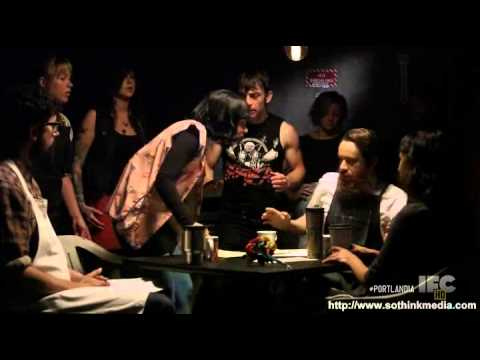

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
%pwd

'C:\\Users\\Aaron\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [4]:
import pandas as pd

url = "data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
import re
from collections import Counter

In [6]:
def tokenize(text):
    tokens = re.sub('[^a-zA-Z]', ' ', text)
    tokens = tokens.lower().split()
    return tokens

In [7]:
shops['review_tokens'] = shops['full_review_text'].apply(tokenize)

In [8]:
shops['review_tokens']

0       [check, in, love, love, loved, the, atmosphere...
1       [listed, in, date, night, austin, ambiance, in...
2       [check, in, listed, in, brunch, spots, i, love...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [check, in, they, are, located, within, the, n...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: review_tokens, Length: 7616, dtype: object

In [9]:
word_counts = Counter()

shops['review_tokens'].apply(lambda x: word_counts.update(x))

0       None
1       None
2       None
3       None
4       None
        ... 
7611    None
7612    None
7613    None
7614    None
7615    None
Name: review_tokens, Length: 7616, dtype: object

In [10]:
sum(word_counts.values())

793243

In [11]:
shops

,coffee_shop_name,full_review_text,star_rating,review_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[check, in, love, love, loved, the, atmosphere..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[check, in, listed, in, brunch, spots, i, love..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[check, in, they, are, located, within, the, n..."
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[i, actually, step, into, this, restaurant, by..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,"[ok, the, steeping, room, is, awesome, how, do..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[loved, coming, here, for, tea, and, the, atmo..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,"[the, food, is, just, average, the, booths, di..."


In [12]:
shops_good = shops[shops['star_rating'] == ' 5.0 star rating ']
shops_good = shops_good.append(shops[shops['star_rating'] == ' 4.0 star rating '])
shops_good

,coffee_shop_name,full_review_text,star_rating,review_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[check, in, love, love, loved, the, atmosphere..."
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,"[check, ins, love, this, place, stars, for, cl..."
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,"[check, ins, this, place, has, been, shown, on..."
13,The Factory - Cafe With a Soul,12/5/2016 This is such a cute little cafe! I'...,5.0 star rating,"[this, is, such, a, cute, little, cafe, i, ve,..."
14,The Factory - Cafe With a Soul,11/13/2016 Beautiful eccentric coffee shop wi...,5.0 star rating,"[beautiful, eccentric, coffee, shop, with, a, ..."
...,...,...,...,...
7608,The Steeping Room,9/20/2015 I come here when I visit my friend ...,4.0 star rating,"[i, come, here, when, i, visit, my, friend, in..."
7609,The Steeping Room,12/7/2014 1 check-in After noticing many frie...,4.0 star rating,"[check, in, after, noticing, many, friends, ha..."
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[i, actually, step, into, this, restaurant, by..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[loved, coming, here, for, tea, and, the, atmo..."


In [13]:
shops_bad = shops[shops['star_rating'] == ' 3.0 star rating ']
shops_bad = shops_bad.append(shops[shops['star_rating'] == ' 2.0 star rating '])
shops_bad = shops_bad.append(shops[shops['star_rating'] == ' 1.0 star rating '])
shops_bad

,coffee_shop_name,full_review_text,star_rating,review_tokens
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,"[check, in, ok, let, s, try, this, approach, p..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,"[the, store, has, a, decoration, but, honestly..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,"[check, in, listed, in, the, third, time, is, ..."
33,The Factory - Cafe With a Soul,11/23/2016 1 check-in My best friend and I ca...,3.0 star rating,"[check, in, my, best, friend, and, i, came, to..."
48,The Factory - Cafe With a Soul,"11/26/2016 1 check-in I love the deco a lot, ...",3.0 star rating,"[check, in, i, love, the, deco, a, lot, it, s,..."
...,...,...,...,...
7518,The Steeping Room,"12/3/2016 Nice place , ??? Very disappointed ...",1.0 star rating,"[nice, place, very, disappointed, with, the, h..."
7551,The Steeping Room,4/25/2016 This is my experience at this estab...,1.0 star rating,"[this, is, my, experience, at, this, establish..."
7553,The Steeping Room,3/6/2016 We went to steeping room this mornin...,1.0 star rating,"[we, went, to, steeping, room, this, morning, ..."
7554,The Steeping Room,8/31/2015 Updated review I have to downgrade ...,1.0 star rating,"[updated, review, i, have, to, downgrade, my, ..."


In [14]:
word_counts_good = Counter()

shops_good['review_tokens'].apply(lambda x: word_counts_good.update(x))
sum(word_counts_good.values())

610477

In [15]:
word_counts_bad = Counter()

shops_bad['review_tokens'].apply(lambda x: word_counts_bad.update(x))
sum(word_counts_bad.values())

182766

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [16]:
word_counts_bad.most_common(10)

[('the', 8219),
 ('i', 6343),
 ('and', 5369),
 ('a', 5083),
 ('to', 4438),
 ('it', 3171),
 ('was', 2935),
 ('of', 2674),
 ('in', 2407),
 ('is', 2356)]

In [17]:
word_counts_good.most_common(10)

[('the', 26690),
 ('and', 21405),
 ('i', 18287),
 ('a', 17774),
 ('to', 12907),
 ('of', 9964),
 ('is', 9648),
 ('it', 9522),
 ('in', 9202),
 ('coffee', 8397)]

In [18]:
STOP_WORDS = nlp.Defaults.stop_words

In [32]:
good = pd.DataFrame.from_dict(word_counts_good, orient='index')
bad = pd.DataFrame.from_dict(word_counts_bad, orient='index')
reviews = good
reviews['good'] = good
reviews['bad'] = bad
reviews = reviews.drop(reviews.columns[0], axis=1)
reviews

,good,bad
check,2852,505.0
in,9202,2407.0
love,1735,211.0
loved,331,37.0
the,26690,8219.0
...,...,...
squint,1,1.0
actuality,1,NaN
crass,1,NaN
budha,2,NaN


In [33]:
reviews['good_norm'] = reviews['good']/reviews['good'].sum()
reviews['bad_norm'] = reviews['bad']/reviews['bad'].sum()
reviews

,good,bad,good_norm,bad_norm
check,2852,505.0,0.004672,0.002804
in,9202,2407.0,0.015073,0.013367
love,1735,211.0,0.002842,0.001172
loved,331,37.0,0.000542,0.000205
the,26690,8219.0,0.043720,0.045642
...,...,...,...,...
squint,1,1.0,0.000002,0.000006
actuality,1,NaN,0.000002,NaN
crass,1,NaN,0.000002,NaN
budha,2,NaN,0.000003,NaN


In [34]:
reviews['good_dif'] = reviews['good']/(reviews['good']+reviews['bad'])
reviews['bad_dif'] = reviews['bad']/(reviews['good']+reviews['bad'])
reviews

,good,bad,good_norm,bad_norm,good_dif,bad_dif
check,2852,505.0,0.004672,0.002804,0.624889,0.375111
in,9202,2407.0,0.015073,0.013367,0.530007,0.469993
love,1735,211.0,0.002842,0.001172,0.708072,0.291928
loved,331,37.0,0.000542,0.000205,0.725186,0.274814
the,26690,8219.0,0.043720,0.045642,0.489245,0.510755
...,...,...,...,...,...,...
squint,1,1.0,0.000002,0.000006,0.227784,0.772216
actuality,1,NaN,0.000002,NaN,NaN,NaN
crass,1,NaN,0.000002,NaN,NaN,NaN
budha,2,NaN,0.000003,NaN,NaN,NaN


In [41]:
reviews['good_total_dif'] = reviews['good']-reviews['bad']
reviews['bad_total_dif'] = reviews['bad']-reviews['good']
reviews

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif
check,2852,505.0,0.004672,0.002804,0.624889,0.375111,2347.0,-2347.0
in,9202,2407.0,0.015073,0.013367,0.530007,0.469993,6795.0,-6795.0
love,1735,211.0,0.002842,0.001172,0.708072,0.291928,1524.0,-1524.0
loved,331,37.0,0.000542,0.000205,0.725186,0.274814,294.0,-294.0
the,26690,8219.0,0.043720,0.045642,0.489245,0.510755,18471.0,-18471.0
...,...,...,...,...,...,...,...,...
squint,1,1.0,0.000002,0.000006,0.227784,0.772216,0.0,0.0
actuality,1,NaN,0.000002,NaN,NaN,NaN,NaN,NaN
crass,1,NaN,0.000002,NaN,NaN,NaN,NaN,NaN
budha,2,NaN,0.000003,NaN,NaN,NaN,NaN,NaN


In [42]:
reviews['good_total_norm_dif'] = reviews['good_norm']-reviews['bad_norm']
reviews['bad_total_norm_dif'] = reviews['bad_norm']-reviews['good_norm']
reviews

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
check,2852,505.0,0.004672,0.002804,0.624889,0.375111,2347.0,-2347.0,0.001867,-0.001867
in,9202,2407.0,0.015073,0.013367,0.530007,0.469993,6795.0,-6795.0,0.001707,-0.001707
love,1735,211.0,0.002842,0.001172,0.708072,0.291928,1524.0,-1524.0,0.001670,-0.001670
loved,331,37.0,0.000542,0.000205,0.725186,0.274814,294.0,-294.0,0.000337,-0.000337
the,26690,8219.0,0.043720,0.045642,0.489245,0.510755,18471.0,-18471.0,-0.001922,0.001922
...,...,...,...,...,...,...,...,...,...,...
squint,1,1.0,0.000002,0.000006,0.227784,0.772216,0.0,0.0,-0.000004,0.000004
actuality,1,NaN,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crass,1,NaN,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budha,2,NaN,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
reviews.sort_values(by ='good_dif').head(10)

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
inconvenience,1,12.0,0.000002,0.000067,0.023991,0.976009,-11.0,11.0,-0.000065,0.000065
tipped,1,11.0,0.000002,0.000061,0.026116,0.973884,-10.0,10.0,-0.000059,0.000059
toilet,1,10.0,0.000002,0.000056,0.028652,0.971348,-9.0,9.0,-0.000054,0.000054
stack,1,10.0,0.000002,0.000056,0.028652,0.971348,-9.0,9.0,-0.000054,0.000054
understanding,1,9.0,0.000002,0.000050,0.031735,0.968265,-8.0,8.0,-0.000048,0.000048
undercooked,1,9.0,0.000002,0.000050,0.031735,0.968265,-8.0,8.0,-0.000048,0.000048
existent,1,9.0,0.000002,0.000050,0.031735,0.968265,-8.0,8.0,-0.000048,0.000048
acknowledged,1,8.0,0.000002,0.000044,0.035561,0.964439,-7.0,7.0,-0.000043,0.000043
laying,1,8.0,0.000002,0.000044,0.035561,0.964439,-7.0,7.0,-0.000043,0.000043
silence,1,7.0,0.000002,0.000039,0.040435,0.959565,-6.0,6.0,-0.000037,0.000037


In [44]:
reviews.sort_values(by ='bad_dif').head(10)

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
authentic,72,1.0,0.000118,0.000006,0.955032,0.044968,71.0,-71.0,0.000112,-0.000112
yum,119,2.0,0.000195,0.000011,0.946094,0.053906,117.0,-117.0,0.000184,-0.000184
swing,49,1.0,0.000080,0.000006,0.935291,0.064709,48.0,-48.0,0.000075,-0.000075
patient,47,1.0,0.000077,0.000006,0.932722,0.067278,46.0,-46.0,0.000071,-0.000071
lane,45,1.0,0.000074,0.000006,0.929942,0.070058,44.0,-44.0,0.000068,-0.000068
power,44,1.0,0.000072,0.000006,0.928463,0.071537,43.0,-43.0,0.000067,-0.000067
mimosas,40,1.0,0.000066,0.000006,0.921869,0.078131,39.0,-39.0,0.000060,-0.000060
legit,40,1.0,0.000066,0.000006,0.921869,0.078131,39.0,-39.0,0.000060,-0.000060
katsu,79,2.0,0.000129,0.000011,0.920958,0.079042,77.0,-77.0,0.000118,-0.000118
juices,37,1.0,0.000061,0.000006,0.916065,0.083935,36.0,-36.0,0.000055,-0.000055


In [45]:
reviews.sort_values(by ='good_total_dif').head(10)

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
rude,19,119.0,0.000031,0.000661,0.044978,0.955022,-100.0,100.0,-0.000630,0.000630
asked,128,203.0,0.000210,0.001127,0.156825,0.843175,-75.0,75.0,-0.000918,0.000918
meh,14,53.0,0.000023,0.000294,0.072285,0.927715,-39.0,39.0,-0.000271,0.000271
horrible,11,49.0,0.000018,0.000272,0.062106,0.937894,-38.0,38.0,-0.000254,0.000254
ok,125,159.0,0.000205,0.000883,0.188244,0.811756,-34.0,34.0,-0.000678,0.000678
mediocre,16,50.0,0.000026,0.000278,0.086250,0.913750,-34.0,34.0,-0.000251,0.000251
attitude,33,64.0,0.000054,0.000355,0.132017,0.867983,-31.0,31.0,-0.000301,0.000301
rating,17,48.0,0.000028,0.000267,0.094588,0.905412,-31.0,31.0,-0.000239,0.000239
overpriced,27,56.0,0.000044,0.000311,0.124512,0.875488,-29.0,29.0,-0.000267,0.000267
worst,22,51.0,0.000036,0.000283,0.112880,0.887120,-29.0,29.0,-0.000247,0.000247


In [46]:
reviews.sort_values(by ='bad_total_dif').head(10)

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
the,26690,8219.0,0.043720,0.045642,0.489245,0.510755,18471.0,-18471.0,-0.001922,0.001922
and,21405,5369.0,0.035063,0.029815,0.540440,0.459560,16036.0,-16036.0,0.005247,-0.005247
a,17774,5083.0,0.029115,0.028227,0.507741,0.492259,12691.0,-12691.0,0.000888,-0.000888
i,18287,6343.0,0.029955,0.035224,0.459581,0.540419,11944.0,-11944.0,-0.005269,0.005269
to,12907,4438.0,0.021142,0.024645,0.461750,0.538250,8469.0,-8469.0,-0.003503,0.003503
is,9648,2356.0,0.015804,0.013083,0.547090,0.452910,7292.0,-7292.0,0.002721,-0.002721
of,9964,2674.0,0.016322,0.014849,0.523616,0.476384,7290.0,-7290.0,0.001472,-0.001472
in,9202,2407.0,0.015073,0.013367,0.530007,0.469993,6795.0,-6795.0,0.001707,-0.001707
it,9522,3171.0,0.015598,0.017609,0.469710,0.530290,6351.0,-6351.0,-0.002012,0.002012
coffee,8397,2175.0,0.013755,0.012078,0.532449,0.467551,6222.0,-6222.0,0.001677,-0.001677


In [47]:
reviews.sort_values(by ='good_total_norm_dif').head(10)

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
i,18287,6343.0,0.029955,0.035224,0.459581,0.540419,11944.0,-11944.0,-0.005269,0.005269
was,6777,2935.0,0.011101,0.016299,0.405153,0.594847,3842.0,-3842.0,-0.005198,0.005198
t,3473,1678.0,0.005689,0.009318,0.379081,0.620919,1795.0,-1795.0,-0.003629,0.003629
to,12907,4438.0,0.021142,0.024645,0.461750,0.538250,8469.0,-8469.0,-0.003503,0.003503
not,2832,1436.0,0.004639,0.007974,0.367782,0.632218,1396.0,-1396.0,-0.003335,0.003335
but,4656,1931.0,0.007627,0.010723,0.415628,0.584372,2725.0,-2725.0,-0.003096,0.003096
that,4845,1824.0,0.007936,0.010129,0.439313,0.560687,3021.0,-3021.0,-0.002193,0.002193
it,9522,3171.0,0.015598,0.017609,0.469710,0.530290,6351.0,-6351.0,-0.002012,0.002012
the,26690,8219.0,0.043720,0.045642,0.489245,0.510755,18471.0,-18471.0,-0.001922,0.001922
just,1804,828.0,0.002955,0.004598,0.391236,0.608764,976.0,-976.0,-0.001643,0.001643


In [48]:
reviews.sort_values(by ='bad_total_norm_dif').head(10)

,good,bad,good_norm,bad_norm,good_dif,bad_dif,good_total_dif,bad_total_dif,good_total_norm_dif,bad_total_norm_dif
and,21405,5369.0,0.035063,0.029815,0.540440,0.459560,16036.0,-16036.0,0.005247,-0.005247
great,3473,466.0,0.005689,0.002588,0.687342,0.312658,3007.0,-3007.0,0.003101,-0.003101
is,9648,2356.0,0.015804,0.013083,0.547090,0.452910,7292.0,-7292.0,0.002721,-0.002721
check,2852,505.0,0.004672,0.002804,0.624889,0.375111,2347.0,-2347.0,0.001867,-0.001867
in,9202,2407.0,0.015073,0.013367,0.530007,0.469993,6795.0,-6795.0,0.001707,-0.001707
austin,2049,298.0,0.003356,0.001655,0.669770,0.330230,1751.0,-1751.0,0.001702,-0.001702
coffee,8397,2175.0,0.013755,0.012078,0.532449,0.467551,6222.0,-6222.0,0.001677,-0.001677
love,1735,211.0,0.002842,0.001172,0.708072,0.291928,1524.0,-1524.0,0.001670,-0.001670
delicious,1323,90.0,0.002167,0.000500,0.812598,0.187402,1233.0,-1233.0,0.001667,-0.001667
you,5619,1370.0,0.009204,0.007608,0.547475,0.452525,4249.0,-4249.0,0.001596,-0.001596


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

